Титаник

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

pd.set_option('future.no_silent_downcasting', True)

In [18]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_test_y = pd.read_csv("gender_submission.csv")["Survived"]
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
df_X = df_train.drop(["Survived"], axis=1)
df_y = df_train["Survived"]

In [20]:
df_X.isna().sum(), df_y.isna().sum()

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 0)

In [21]:
df_test.isna().sum(), df_test_y.isna().sum()

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64,
 0)

In [22]:
def make_data(fr):
    fr = fr.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
    fr["Sex"] = fr["Sex"].replace({"male": 0, "female": 1})
    
    fr["Embarked"].fillna(fr["Embarked"].mode()[0])
    # fr.loc[fr["Embarked"].isna(), "Embarked"] = fr["Embarked"].mode()[0]
    fr = pd.concat([fr, pd.get_dummies(fr["Embarked"]).astype('int')], axis=1)
    fr = fr.drop("Embarked", axis=1)

    # fr.loc[fr["Age"].isna(), "Age"] = fr["Age"].mean()
    # fr.loc[fr["Fare"].isna(), "Fare"] = fr["Fare"].mean()

    fr = fr.fillna(fr.mean())

    fr = (fr - fr.min()) / (fr.max() - fr.min())


    return fr

df_X_norm = make_data(df_X)
df_test_norm = make_data(df_test)

df_X_norm.isna().sum(), df_test_norm.isna().sum()

(Pclass    0
 Sex       0
 Age       0
 SibSp     0
 Parch     0
 Fare      0
 C         0
 Q         0
 S         0
 dtype: int64,
 Pclass    0
 Sex       0
 Age       0
 SibSp     0
 Parch     0
 Fare      0
 C         0
 Q         0
 S         0
 dtype: int64)

In [23]:
def make_y(fr):
    return fr

df_y_norm = make_y(df_y)

In [24]:
df_X_norm.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0
1,0.0,1.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.0,0.0,0.015469,0.0,0.0,1.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,1.0,0.0,0.434531,0.0,0.0,0.015713,0.0,0.0,1.0


In [30]:
a = df_X_norm.join(df_y)
a.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Survived
Pclass,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,-0.338481
Sex,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.082853,0.074115,-0.125722,0.543351
Age,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.027121,-0.069809
SibSp,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,-0.035322
Parch,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,0.081629
Fare,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,0.257307
C,-0.243292,0.082853,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,0.168240
Q,0.221009,0.074115,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,0.003650
S,0.081720,-0.125722,-0.027121,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,-0.155660
Survived,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,1.000000


In [26]:
n = 1000
lin = np.linspace(0, 1, n)

0.9665071770334929 0.9712918660287081 0.5025025025025025


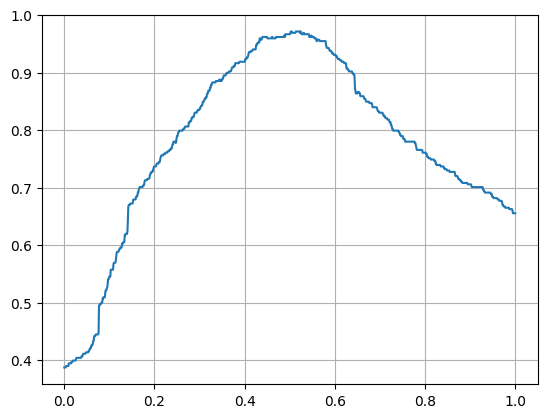

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(df_X_norm, df_y_norm)

pred_lr = lr.predict(df_test_norm)

score_lr = np.array([accuracy_score(pred_lr >= xi, df_test_y) for xi in lin])

print(score_lr[n//2], score_lr.max(), lin[score_lr.argmax()])
plt.plot(lin, score_lr)
plt.grid()

0.6363636363636364


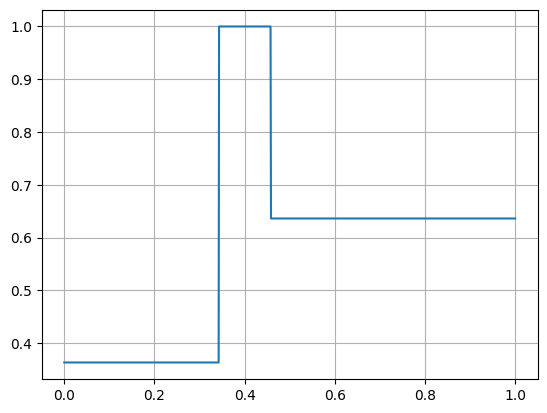

In [28]:
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.1).fit(df_X_norm, df_y_norm)

pred_las = las.predict(df_test_norm)
score_las = [accuracy_score(pred_las >= xi, df_test_y) for xi in lin]

print(score_las[n//2])
plt.plot(lin, score_las)
plt.grid()

0.9521531100478469


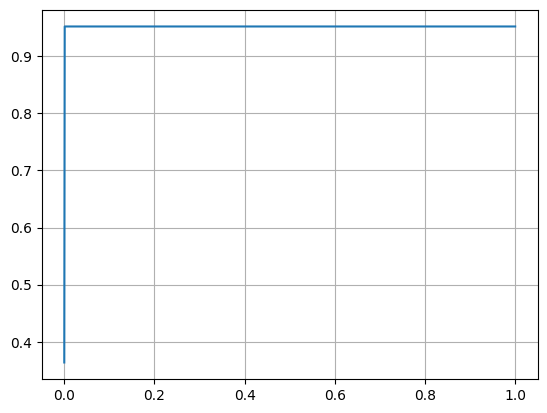

In [29]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression().fit(df_X_norm, df_y_norm)

pred_log = log.predict(df_test_norm)
score_log = [accuracy_score(pred_log >= xi, df_test_y) for xi in lin]

print(score_log[n//2])
plt.plot(lin, score_log)
plt.grid()